In [69]:
import pandas as pd

from sklearn import tree, externals
from sklearn import linear_model

%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [70]:
df = pd.read_csv('pets.csv')

In [71]:
df

,name,animal,size,friendly
0,Bo,snake,small,True
1,Miles,dog,small,True
2,Fifi,cat,small,False
3,Muffy,cat,small,True
4,Rufus,dog,large,True
5,Jebediah,snail,small,True
6,Aloysius,dog,large,False
7,Tom,cat,large,False


In [72]:
x = df[ ['name', 'animal', 'size'] ]
c = df.friendly

In [73]:
x

,name,animal,size
0,Bo,snake,small
1,Miles,dog,small
2,Fifi,cat,small
3,Muffy,cat,small
4,Rufus,dog,large
5,Jebediah,snail,small
6,Aloysius,dog,large
7,Tom,cat,large


In [74]:
names_df = pd.get_dummies(df.name)
animal_df = pd.get_dummies(df.animal)
size_df = pd.get_dummies(df['size'])

up_to_4_letter_name = df.name.str.len()<=4
name_begins_with_A = df.name.str.startswith('A')

In [75]:
X = pd.concat([names_df, animal_df, size_df], axis = 1)

X

,Aloysius,Bo,Fifi,Jebediah,Miles,Muffy,Rufus,Tom,cat,dog,snail,snake,large,small
0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [76]:
animal_df

,cat,dog,snail,snake
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,1,0,0,0


In [77]:
c

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7    False
Name: friendly, dtype: bool

In [78]:
model = tree.DecisionTreeClassifier().fit(X, c)

In [79]:
model.score(X, c)

1.0

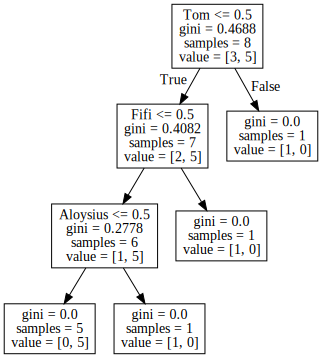

In [80]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [81]:
X

,Aloysius,Bo,Fifi,Jebediah,Miles,Muffy,Rufus,Tom,cat,dog,snail,snake,large,small
0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [82]:
X.drop(['cat', 'large'], axis = 1, inplace = True)

In [83]:
X

,Aloysius,Bo,Fifi,Jebediah,Miles,Muffy,Rufus,Tom,dog,snail,snake,small
0,0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,1,0,1
6,1,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0


In [90]:
model = linear_model.LogisticRegression(penalty = '11', C = 1000).fit(X,c)

ValueError: Unsupported set of arguments: The combination of penalty='11' and loss='logistic_regression' is not supported, Parameters: penalty='11', loss='logistic_regression', dual=False

In [85]:
model.score(X,c)

0.875

In [86]:
model.coef_

array([[-0.44477703,  0.25150442, -0.51753601,  0.25150442,  0.26342078,
         0.29301134,  0.35857697, -0.40994841,  0.17722073,  0.25150442,
         0.25150442,  0.54190495]])

In [91]:
import numpy as np

np.logspace(2, -4, 10)

array([  1.00000000e+02,   2.15443469e+01,   4.64158883e+00,
         1.00000000e+00,   2.15443469e-01,   4.64158883e-02,
         1.00000000e-02,   2.15443469e-03,   4.64158883e-04,
         1.00000000e-04])

In [92]:
coefs_df = pd.DataFrame(columns = X.columns)

coefs_df

,Aloysius,Bo,Fifi,Jebediah,Miles,Muffy,Rufus,Tom,dog,snail,snake,small


In [ ]:
for C is np.logspace(2, -4, 10):
    model = linear_model.LogisticRegression(penalty = '11', C = 1000).fit(X,c)
    coefs = pd.Series(model.)